To send the predictions of your model, you need to fill in the parameters below:

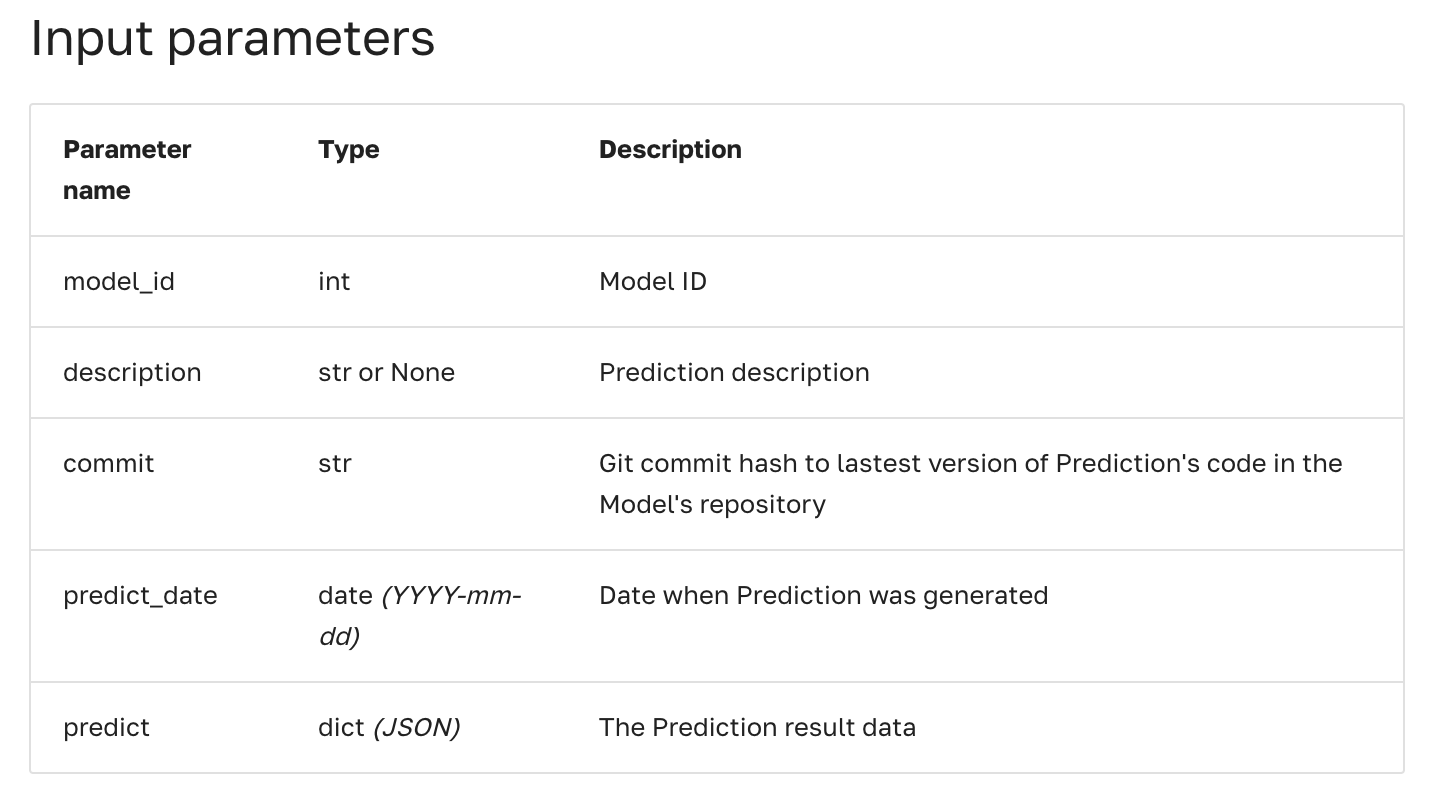

Packages necessary:

In [1]:
import pickle
import requests
import pandas as pd

Don't forget to add your X-UID-Key in the code below. You can get the number of the latest commit in your repo going in: 
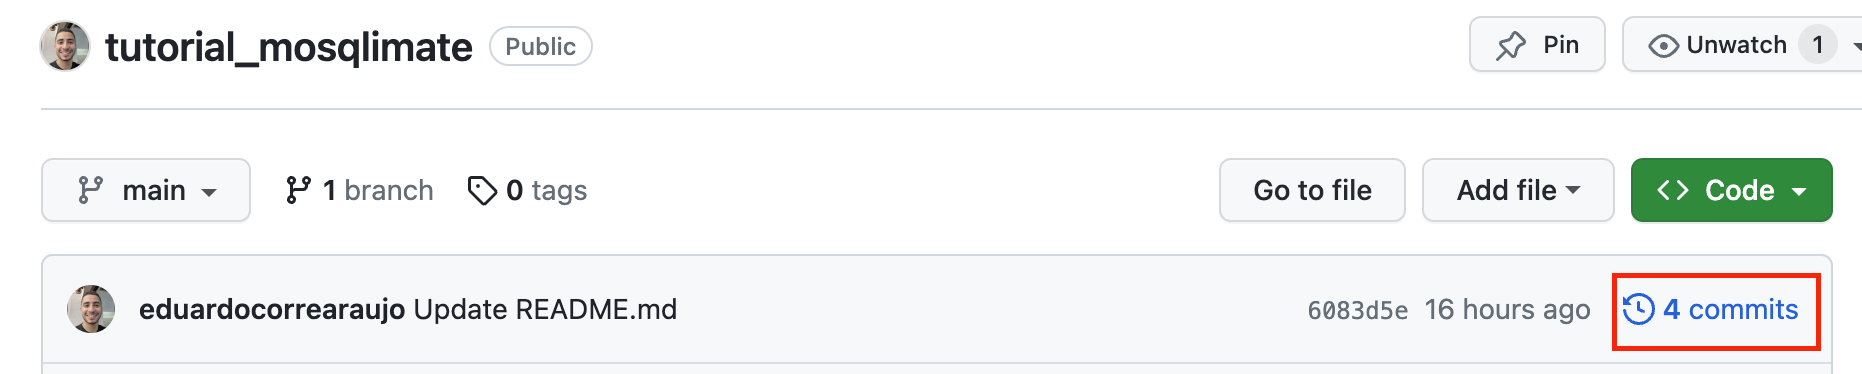

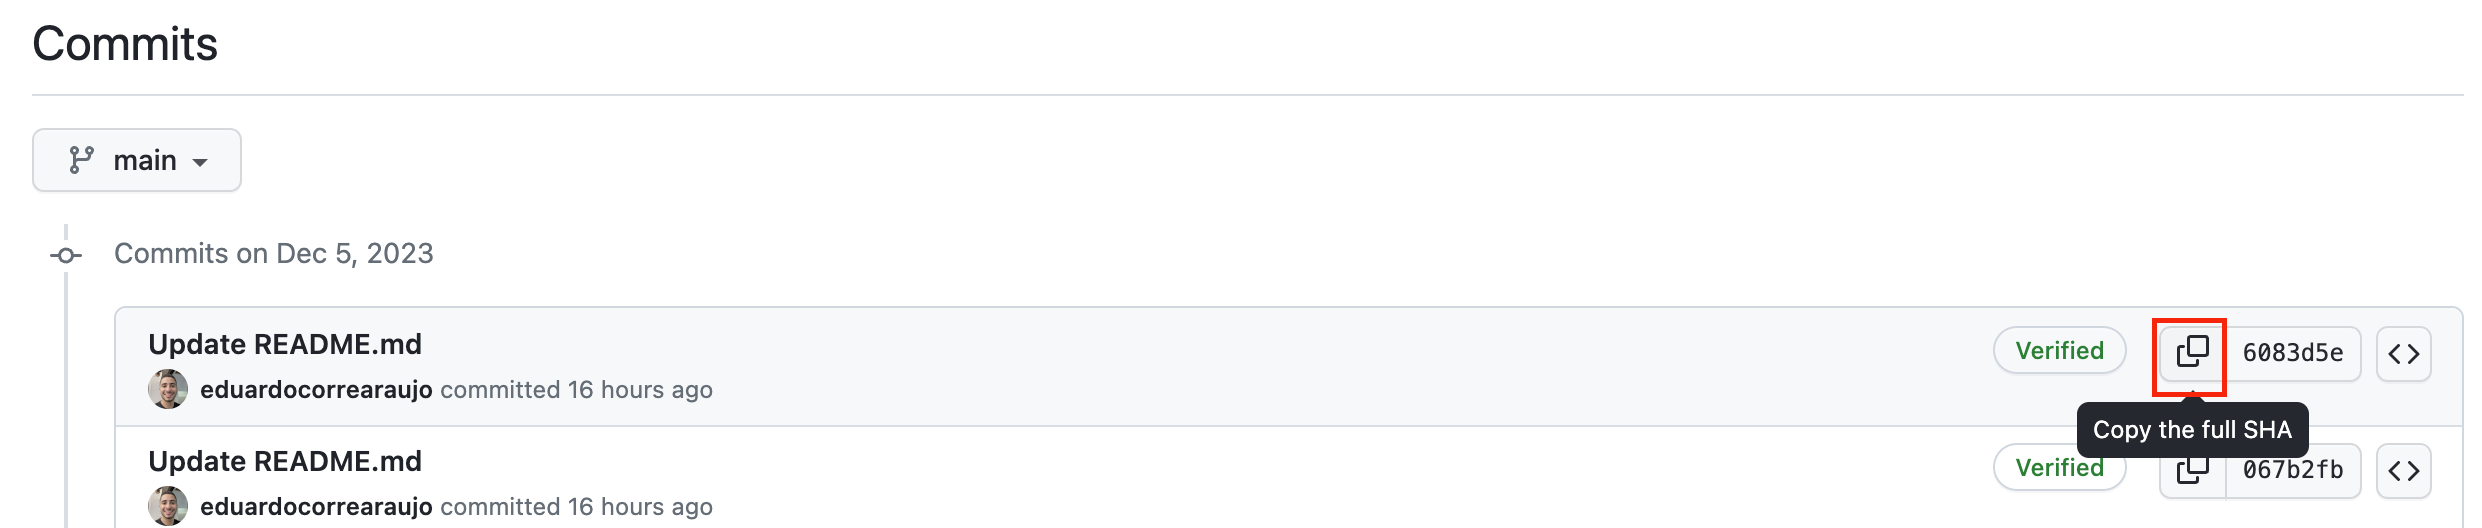

and pasting the string on the parameter of the function below:

In [2]:
def post_prediction(
    model_id: int, 
    description: str, 
    commit: str, 
    predict_date: str, 
    predict: dict
):
    url = "https://api.mosqlimate.org/api/registry/predictions/"
    headers = {"X-UID-Key": "eduardocorrearaujo:b35a9f09-fbd2-4764-9503-d0650e50d7e1"}
    prediction = {
        "model": model_id,
        "description": description,
        "commit": commit,
        "predict_date": predict_date,
        "prediction": predict
    }
    return requests.post(url, json=prediction, headers=headers)

The importance of having the parameters `commit` and `predict_date` is to have a temporal idea of when the prediction was made, later in the platform, we can compare the performance of predictions associated with different versions of your code. 

In the cell below, we will load our predictions and transform them in JSON using: `df.to_json(orient = 'records', date_format = 'iso')`. **Don't forget to update your model_id**.

In [4]:

df = pd.read_csv(f'./forecast_3304557.csv')

    
model_id = 9
description= f'Example Forecast of new cases for 3304557 (Rio de Janeiro) between 2022-01-01 and 2023-07-02'
commit ='6083d5ebdabbf7cc61dc46da7c4250ce60e2967c' 
predict_date = '2023-12-06'
predict = df.to_json(orient = 'records', date_format = 'iso')

    
    
res = post_prediction(
model_id, 
description, 
commit, 
predict_date, 
predict
)


In [5]:
res.text

'{"id": 76, "model": {"id": 9, "name": "Example of Univariate neural prophet model", "description": "In this repo, it\'s implemented a neural prophet model that based only on the times series of cases \\r\\ncompute the cases in the next four weeks.", "author": {"user": {"name": "Eduardo Correa Araujo", "username": "eduardocorrearaujo"}, "institution": null}, "repository": "https://github.com/eduardocorrearaujo/tutorial_mosqlimate", "implementation_language": {"language": "Python"}, "disease": "dengue", "type": "forescast", "ADM_level": 2, "time_resolution": "week"}, "description": "Example Forecast of new cases for 3304557 (Rio de Janeiro) between 2022-01-01 and 2023-07-02", "commit": "6083d5ebdabbf7cc61dc46da7c4250ce60e2967c", "predict_date": "2023-12-06", "prediction": "[{\\"dates\\":\\"2022-01-02\\",\\"preds\\":34.8341138916,\\"lower\\":12.8855535734,\\"upper\\":46.5289758201,\\"adm_0\\":\\"BR\\",\\"adm_1\\":\\"RJ\\",\\"adm_2\\":3304557},{\\"dates\\":\\"2022-01-09\\",\\"preds\\":39.

After that, your prediction will show in your account as below, and you can see the visualization by clicking on the icon highlighted:

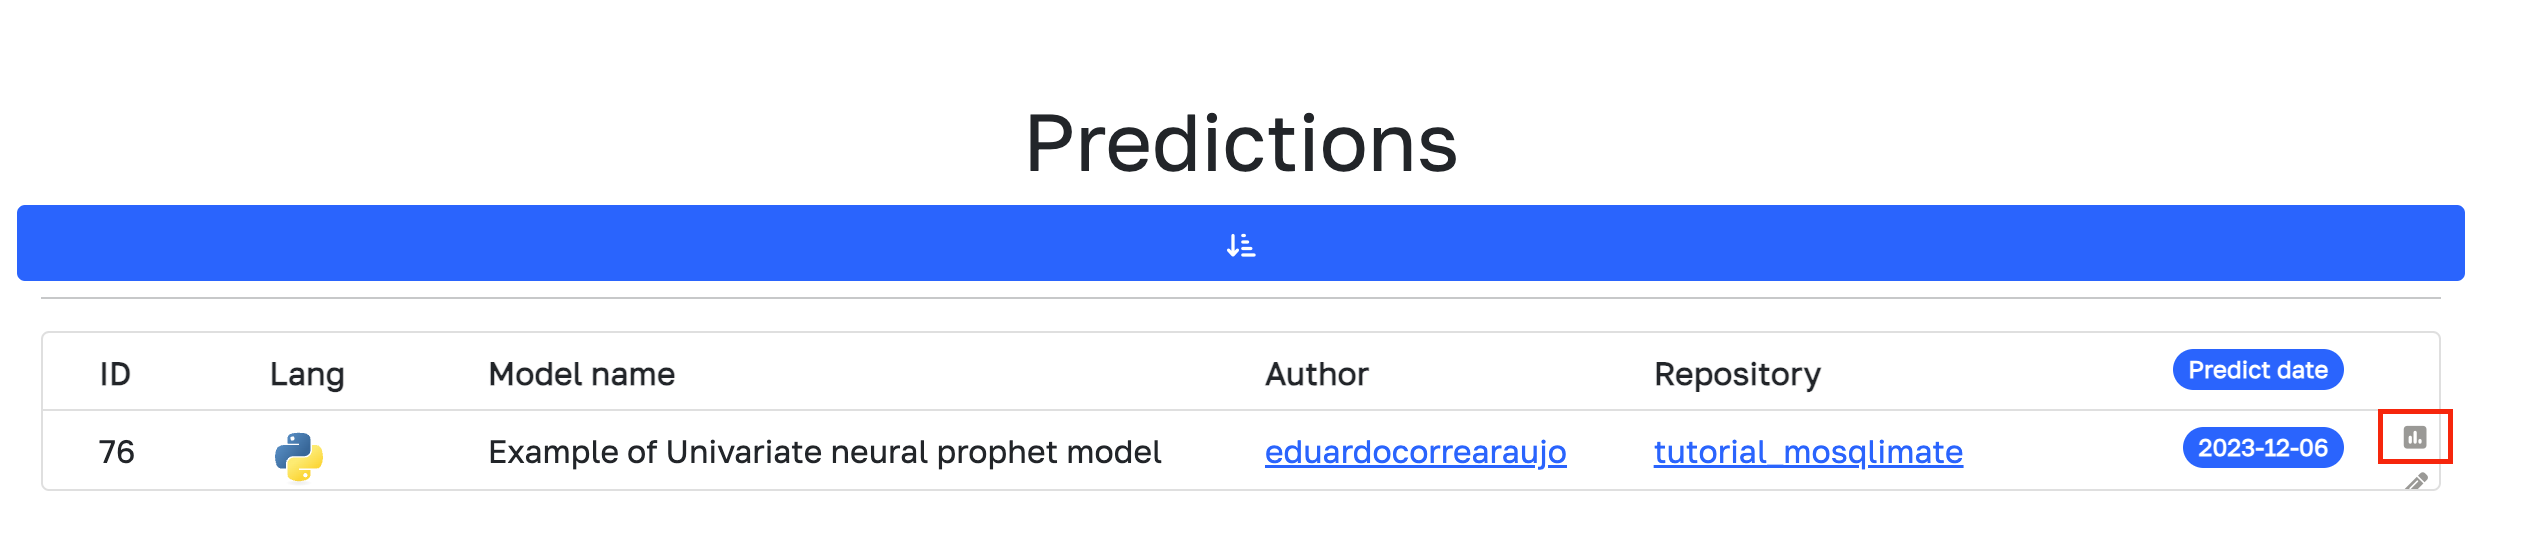


After that, the predictions will be shown by gray lines in the left panel. Hovering with the mouse over one will highlight them in the left panel and display the prediction interval on the right panel:

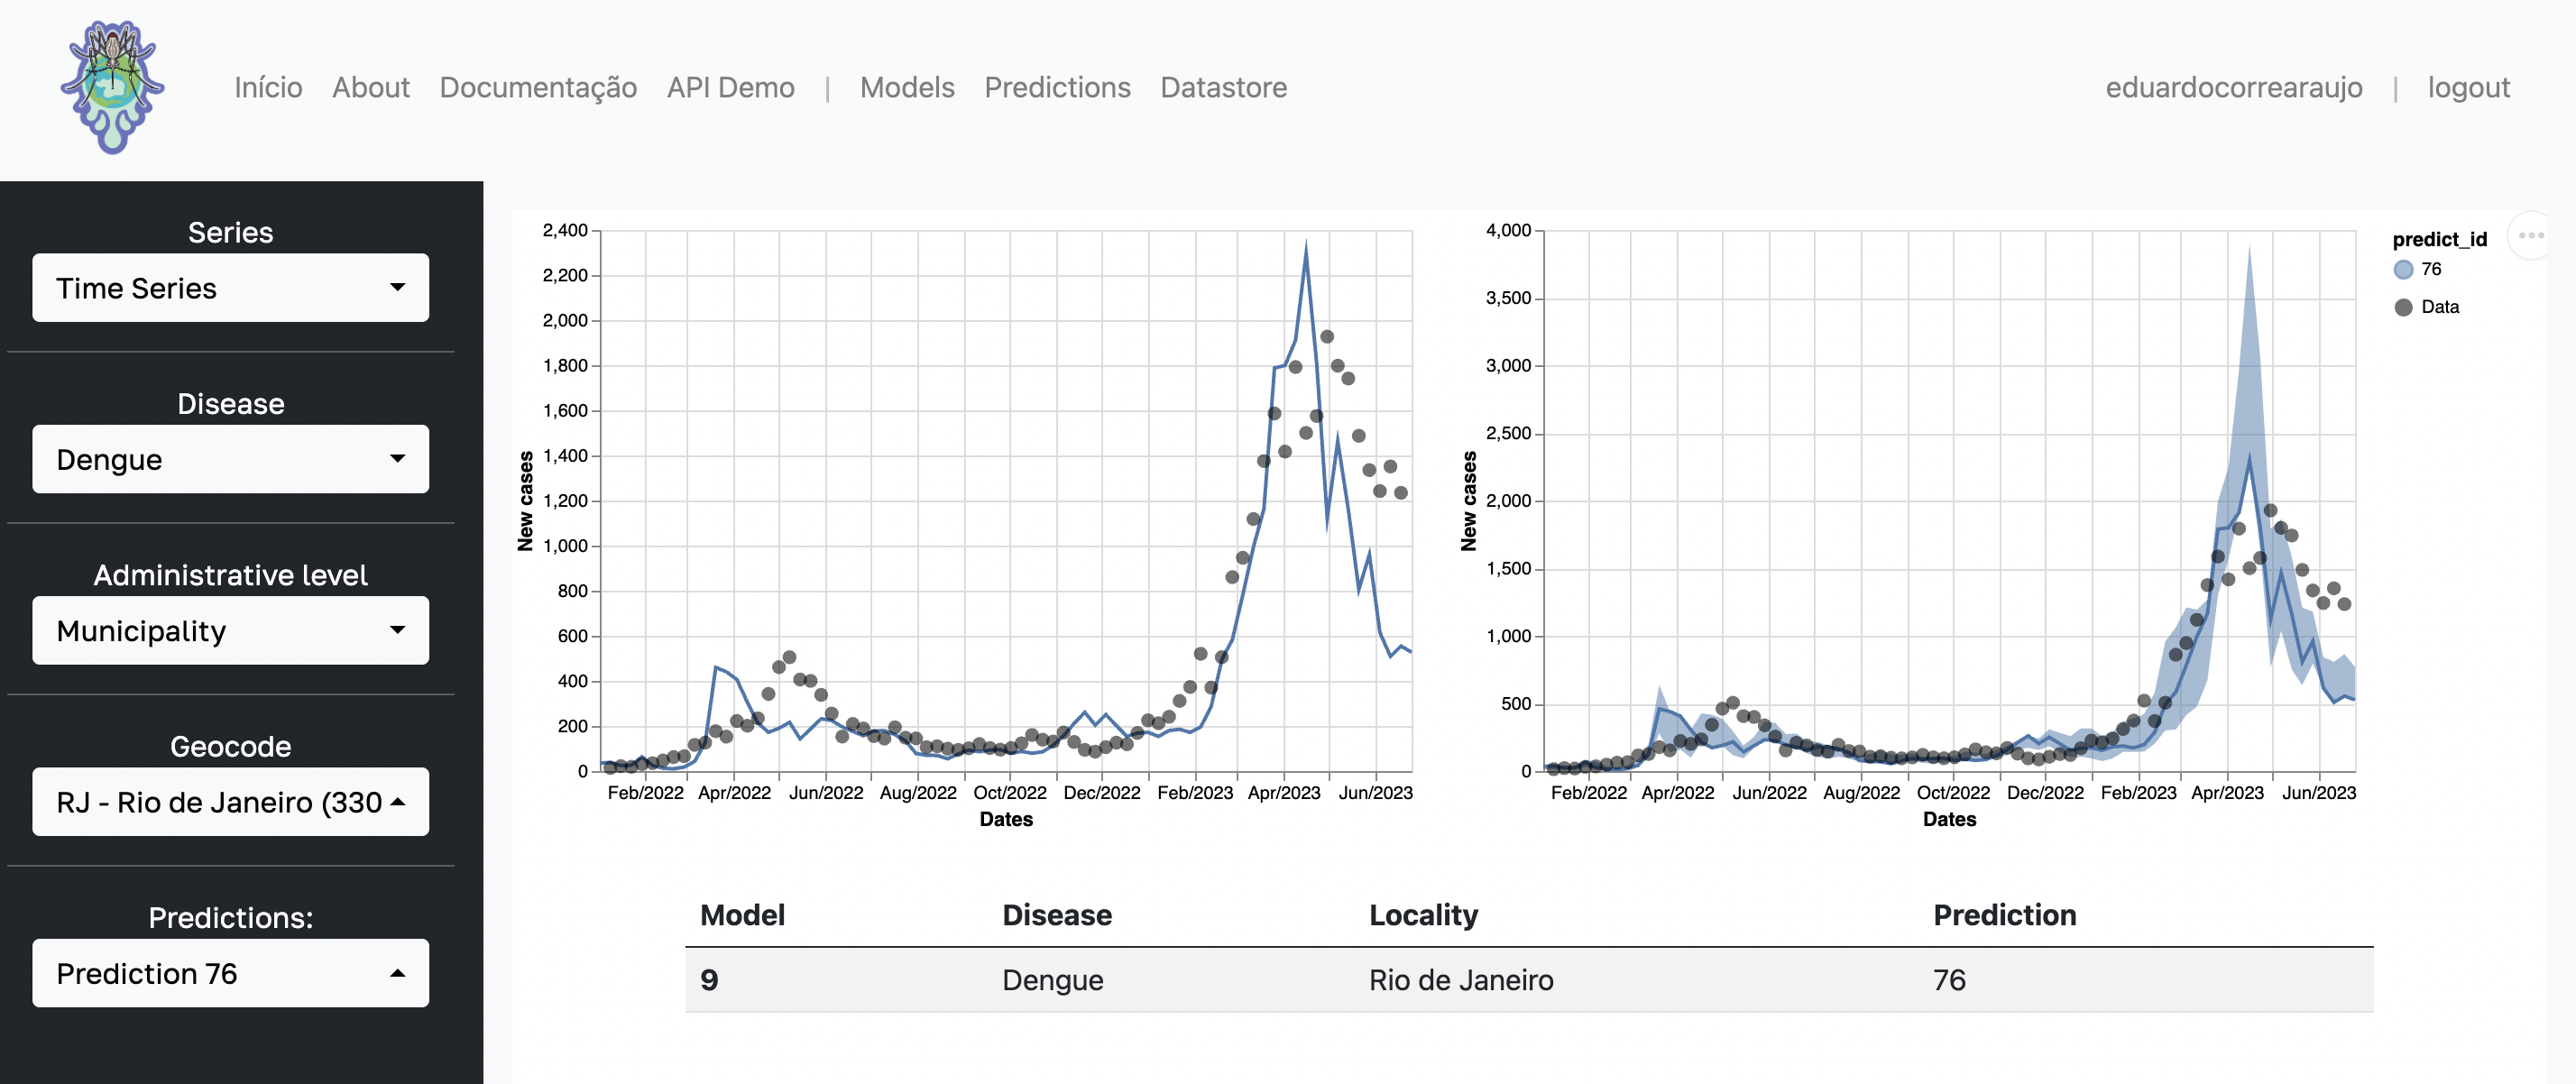